#### IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

#### IMPORTING THE DATA

In [2]:
dataset = pd.read_csv("Dataset/insurance.csv")
# dataset.head()
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values
print(X,Y)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']] [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


#### ENCODING CATEGORICAL DATA

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1,4,5])], remainder="passthrough")
X = np.array((ct.fit_transform(X)))
print(X[0:2])

[[1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 19 27.9 0]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 18 33.77 1]]


#### SPLITTING THE DATA SET INTO THE TRAINING SET AND TEST

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

#### TRAINING THE MULTIPLE LINEAR REGRESSION


In [6]:
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision=4)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[ 1.1253e+04  9.7245e+03]
 [ 9.5449e+03  8.5477e+03]
 [ 3.7850e+04  4.5702e+04]
 [ 1.6069e+04  1.2950e+04]
 [ 6.7344e+03  9.6443e+03]
 [ 4.0045e+03  4.5003e+03]
 [ 1.6058e+03  2.1982e+03]
 [ 1.4302e+04  1.1437e+04]
 [ 8.8970e+03  7.5372e+03]
 [ 7.3411e+03  5.4250e+03]
 [ 4.6736e+03  6.7530e+03]
 [ 1.0163e+04  1.0494e+04]
 [ 8.8922e+03  7.3377e+03]
 [ 3.7851e+03  4.1851e+03]
 [ 2.7473e+04  1.8311e+04]
 [ 1.0854e+04  1.0703e+04]
 [ 1.1098e+04  1.2524e+04]
 [ 6.1533e+03  3.4905e+03]
 [ 8.0581e+03  6.4578e+03]
 [ 2.6973e+04  3.3476e+04]
 [ 3.3330e+04  2.3967e+04]
 [ 1.4251e+04  1.2643e+04]
 [ 1.1854e+04  2.3046e+04]
 [ 3.1992e+04  2.3065e+04]
 [ 4.0894e+03  1.6746e+03]
 [ 9.3168e+03  4.6676e+03]
 [ 1.1434e+03  3.7326e+03]
 [ 9.9127e+03  7.6827e+03]
 [ 3.7518e+03  3.7566e+03]
 [ 1.0267e+04  8.4135e+03]
 [ 8.9001e+03  8.0597e+03]
 [ 3.9958e+04  4.8970e+04]
 [ 1.5759e+04  1.2979e+04]
 [ 1.3931e+04  2.0630e+04]
 [ 2.4637e+04  1.4572e+04]
 [ 5.2246e+03  4.1375e+03]
 [ 1.2665e+04  8.3472e+03]
 

In [7]:
from sklearn.metrics import r2_score
Accuracy = (r2_score(Y_test, Y_pred)) * 100
print("Accuracy :", round(Accuracy,2), end='%') 


Accuracy : 79.09%

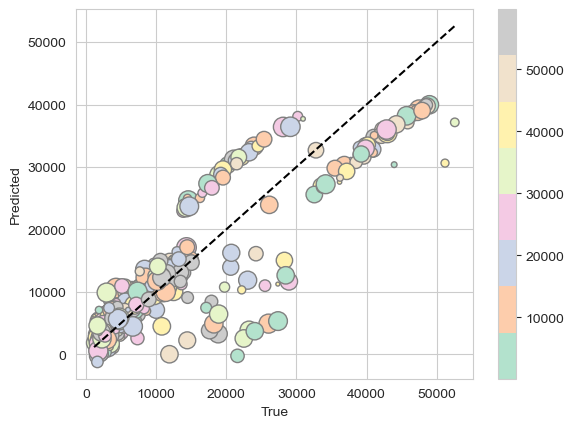

In [8]:
sizes = np.random.randint(200, size=len(Y_pred))
colors = np.random.randint(60000, size=len(Y_pred))
plt.scatter(Y_test, Y_pred, c=colors,cmap='Pastel2', edgecolors='gray' ,s=sizes)
plt.plot([min(Y_test), max(Y_test)] , [min(Y_test), max(Y_test)], 'k--', lw=1.5)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.colorbar()
plt.show()

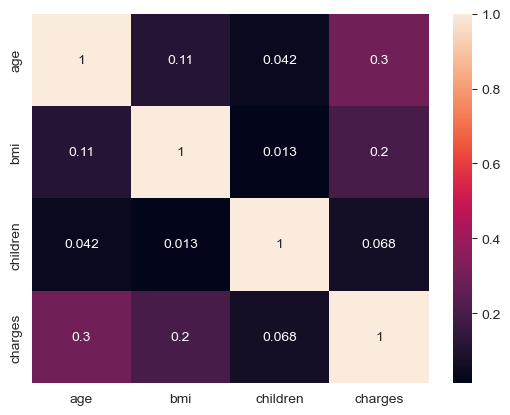

In [9]:
corr_relation = dataset.corr()
sns.heatmap(corr_relation, cmap='rocket', annot=True)
plt.show()